# SantanderCoders - Miniprojeto Pandas

### Grupo 4
Erlon, Fernanda, Henrique, Juliana, Marcela e Mateus

### Importando as bibliotecas a serem usadas

In [1]:
import numpy as np
import pandas as pd
import math

### Carregando as bases e conhecendo os datasets

In [2]:
df_demografico = pd.read_csv('1_demografico.csv', sep=';')
df_renda = pd.read_csv('2_renda_gastos.csv', sep=';')
df_bens = pd.read_csv('3_bens.csv', sep=';')

In [3]:
df_demografico.head()

,ID,Region,Main Source of Income,Agricultural Household indicator,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Walls,House Floor Area,House Age,Number of bedrooms,Electricity
0,1,A,Wage/Salaries,0,Female,49,Single,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,Strong,80,75,3,1
1,2,A,Wage/Salaries,0,Male,40,Married,Worked for private establishment,Single Family,3,0,1,2,Single house,Strong,42,15,2,1
2,3,A,Wage/Salaries,1,Male,39,Married,Worked for private establishment,Single Family,6,0,4,3,Single house,Light,35,12,1,0
3,4,A,Wage/Salaries,0,Male,52,Married,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,Light,30,15,1,1
4,5,A,Wage/Salaries,0,Male,65,Married,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,Quite Strong,54,16,3,1


In [4]:
df_renda.head()

,ID,Region,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites
0,1,A,480332,117848,42140,38300,24676,16806,3325,13460,...,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370
1,2,A,198235,67766,17329,13008,17434,11073,2035,7833,...,41370,27000,3520,12900,5700,29300,9150,1500,0,0
2,3,A,82785,61609,34182,32001,7783,2590,1730,3795,...,14340,7200,70,324,420,425,6450,500,0,0
3,4,A,107589,78189,34030,28659,10914,10812,690,7887,...,16638,6600,60,6840,660,300,3762,500,15580,15580
4,5,A,189322,94625,34820,30167,18391,11309,1395,11260,...,31122,16800,140,6996,2100,0,8472,1000,18887,75687


In [5]:
df_bens.head()

,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,1,1,0,1,1,0,0,0,2,1,0,0,1
1,1,1,1,0,1,0,0,0,3,1,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,3,0,0,0,1


In [6]:
df_demografico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   ID                                       41544 non-null  int64 
 1   Region                                   41544 non-null  object
 2   Main Source of Income                    41544 non-null  object
 3   Agricultural Household indicator         41544 non-null  int64 
 4   Household Head Sex                       41544 non-null  object
 5   Household Head Age                       41544 non-null  int64 
 6   Household Head Marital Status            41544 non-null  object
 7   Household Head Class of Worker           34008 non-null  object
 8   Type of Household                        41544 non-null  object
 9   Total Number of Family members           41544 non-null  int64 
 10  Members with age less than 5 year old    41544 non-null  i

In [7]:
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   ID                                             41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Household Income                         41544 non-null  int64 
 3   Total Food Expenditure                         41544 non-null  int64 
 4   Bread and Cereals Expenditure                  41544 non-null  int64 
 5   Total Rice Expenditure                         41544 non-null  int64 
 6   Meat Expenditure                               41544 non-null  int64 
 7   Total Fish and  marine products Expenditure    41544 non-null  int64 
 8   Fruit Expenditure                              41544 non-null  int64 
 9   Vegetables Expenditure                         41544 non-null

In [8]:
df_bens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Number of Television                    41544 non-null  int64
 1   Number of CD/VCD/DVD                    41544 non-null  int64
 2   Number of Component/Stereo set          41544 non-null  int64
 3   Number of Refrigerator/Freezer          41544 non-null  int64
 4   Number of Washing Machine               41544 non-null  int64
 5   Number of Airconditioner                41544 non-null  int64
 6   Number of Car, Jeep, Van                41544 non-null  int64
 7   Number of Landline/wireless telephones  41544 non-null  int64
 8   Number of Cellular phone                41544 non-null  int64
 9   Number of Personal Computer             41544 non-null  int64
 10  Number of Stove with Oven/Gas Range     41544 non-null  int64
 11  Number of Motor

In [9]:
df_demografico.nunique()

ID                                         4162
Region                                       17
Main Source of Income                         3
Agricultural Household indicator              3
Household Head Sex                            2
Household Head Age                           89
Household Head Marital Status                 6
Household Head Class of Worker                7
Type of Household                             3
Total Number of Family members               21
Members with age less than 5 year old         6
Members with age 5 - 17 years old             9
Total number of family members employed       9
Type of Building/House                        6
Type of Walls                                 6
House Floor Area                            313
House Age                                   111
Number of bedrooms                           10
Electricity                                   2
dtype: int64

In [10]:
df_renda.nunique()

ID                                                4162
Region                                              17
Total Household Income                           38670
Total Food Expenditure                           35776
Bread and Cereals Expenditure                    26082
Total Rice Expenditure                           16145
Meat Expenditure                                 18619
Total Fish and  marine products Expenditure      18014
Fruit Expenditure                                 7140
Vegetables Expenditure                           10599
Restaurant and hotels Expenditure                12367
Alcoholic Beverages Expenditure                   4084
Tobacco Expenditure                               3118
Clothing, Footwear and Other Wear Expenditure     9819
Housing and water Expenditure                    13243
Imputed House Rental Value                         266
Medical Care Expenditure                         11887
Transportation Expenditure                        7435
Communicat

##### df_demografico e df_renda têm o mesmo número de linhas e a mesma quantidade de valores únicos para as colunas 'ID' e 'Region', o que indica que estas são as chaves para combinar os dois primeiros dataframes. Como df_bens não tem chaves para o merge, faremos a combinação deste dataframe com os demais através do index.

### 1) Juntar as bases, observe as colunas coincidentes, caso não exista utilize o indice.

In [11]:
df_final =  (df_demografico
               .merge(df_renda, how='inner', on=['ID', 'Region'])
               .merge(df_bens, how='inner', right_index=True, left_index=True))

In [12]:
df_final.head()

,ID,Region,Main Source of Income,Agricultural Household indicator,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Class of Worker,Type of Household,Total Number of Family members,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,1,A,Wage/Salaries,0,Female,49,Single,Worked for government/government corporation,Extended Family,4,...,1,1,0,0,0,2,1,0,0,1
1,2,A,Wage/Salaries,0,Male,40,Married,Worked for private establishment,Single Family,3,...,0,1,0,0,0,3,1,0,0,2
2,3,A,Wage/Salaries,1,Male,39,Married,Worked for private establishment,Single Family,6,...,0,0,0,0,0,0,0,0,0,0
3,4,A,Wage/Salaries,0,Male,52,Married,Employer in own family-operated farm or business,Single Family,3,...,0,0,0,0,0,1,0,0,0,0
4,5,A,Wage/Salaries,0,Male,65,Married,Self-employed wihout any employee,Single Family,4,...,1,0,0,0,0,3,0,0,0,1


In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41544 entries, 0 to 41543
Data columns (total 54 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   ID                                             41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Main Source of Income                          41544 non-null  object
 3   Agricultural Household indicator               41544 non-null  int64 
 4   Household Head Sex                             41544 non-null  object
 5   Household Head Age                             41544 non-null  int64 
 6   Household Head Marital Status                  41544 non-null  object
 7   Household Head Class of Worker                 34008 non-null  object
 8   Type of Household                              41544 non-null  object
 9   Total Number of Family members                 41544 non-null

##### Checando os NaN

In [14]:
df_final.isna().sum()

ID                                                  0
Region                                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Household Head Sex                                  0
Household Head Age                                  0
Household Head Marital Status                       0
Household Head Class of Worker                   7536
Type of Household                                   0
Total Number of Family members                      0
Members with age less than 5 year old               0
Members with age 5 - 17 years old                   0
Total number of family members employed             0
Type of Building/House                              0
Type of Walls                                       0
House Floor Area                                    0
House Age                                           0
Number of bedrooms                                  0
Electricity                 

### 2) Faca um relatório no qual cada variável quantitativa deve ter:
- Mínimo
- Primeiro Quartil
- Mediana
- Terceiro Quartil
- Máximo
- Média  

##### Obtendo os relatórios das variáveis numéricas, excluindo o ID

In [15]:
relatorio1 = df_final.drop(columns = ['ID']).describe().T

In [27]:
relatorio1.head(12)

,count,mean,std,min,25%,50%,75%,max
Agricultural Household indicator,41544.0,0.429858,0.676666,0.0,0.00,0.0,1.0,2.0
Household Head Age,41544.0,51.381451,14.166081,9.0,41.00,51.0,61.0,99.0
Total Number of Family members,41544.0,4.635182,2.280252,1.0,3.00,4.0,6.0,26.0
Members with age less than 5 year old,41544.0,0.410216,0.694390,0.0,0.00,0.0,1.0,5.0
Members with age 5 - 17 years old,41544.0,1.362579,1.408000,0.0,0.00,1.0,2.0,8.0
Total number of family members employed,41544.0,1.272699,1.149152,0.0,0.00,1.0,2.0,8.0
House Floor Area,41544.0,55.603360,55.023165,5.0,25.00,40.0,70.0,998.0
House Age,41544.0,20.125505,14.295452,0.0,10.00,17.0,26.0,200.0
Number of bedrooms,41544.0,1.788008,1.105664,0.0,1.00,2.0,2.0,9.0
Electricity,41544.0,0.890815,0.311875,0.0,1.00,1.0,1.0,1.0


### 3) Trate os dados Outliers como faltantes e crie novamente o relatório para observarmos a diferenca. 

##### Calculando as métricas para identificação dos outliers

In [17]:
outliers_metrics = pd.DataFrame()
outliers_metrics['IQR'] = relatorio1['75%'] - relatorio1['25%']
outliers_metrics['minimum'] = relatorio1['25%'] - 1.5* outliers_metrics['IQR']
outliers_metrics['maximum'] = relatorio1['75%'] + 1.5* outliers_metrics['IQR']

##### Realizando uma cópia do dataframe final em que os outliers serão substituídos por NaN

In [18]:
df2= df_final.copy()

##### Substituindo os outliers identificados pelo critério do +- 1.5*IQR por NaN

In [19]:
df2, minimo = df2.align(outliers_metrics['minimum'], join='inner', axis=1)
mascara_min =  df2 >= minimo
df2, maximo = df2.align(outliers_metrics['maximum'], join='inner', axis=1)
mascara_max = df2 <= maximo

In [20]:
df2 = df2[mascara_min & mascara_max]
df2.head(15)

,Agricultural Household indicator,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,0,49.0,4.0,0.0,1.0,1.0,80.0,NaN,3.0,1.0,...,1.0,1.0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,NaN
1,0,40.0,3.0,0.0,1.0,2.0,42.0,15.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,NaN
2,1,39.0,6.0,0.0,4.0,3.0,35.0,12.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,52.0,3.0,0.0,3.0,2.0,30.0,15.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,65.0,4.0,0.0,0.0,2.0,54.0,16.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,NaN
5,0,46.0,4.0,0.0,0.0,3.0,40.0,7.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
6,0,45.0,5.0,1.0,0.0,1.0,35.0,18.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN
7,1,33.0,5.0,1.0,1.0,0.0,35.0,48.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN
8,0,17.0,2.0,0.0,2.0,0.0,35.0,8.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
9,0,53.0,6.0,0.0,0.0,1.0,70.0,12.0,3.0,1.0,...,1.0,0.0,0.0,NaN,0.0,4.0,NaN,0.0,0.0,0.0


In [21]:
df2.isna().sum()

Agricultural Household indicator                     0
Household Head Age                                  68
Total Number of Family members                     667
Members with age less than 5 year old              589
Members with age 5 - 17 years old                  434
Total number of family members employed            161
House Floor Area                                  2547
House Age                                         1583
Number of bedrooms                                2616
Electricity                                       4536
Total Household Income                            3151
Total Food Expenditure                            1849
Bread and Cereals Expenditure                     1024
Total Rice Expenditure                             999
Meat Expenditure                                  2124
Total Fish and  marine products Expenditure       1878
Fruit Expenditure                                 2833
Vegetables Expenditure                            1716
Restaurant

##### Obtendo o relatório das medidas de posição e dispersão dos dados sem os outliers

In [22]:
relatorio2 = df2.describe().T

In [23]:
relatorio2

,count,mean,std,min,25%,50%,75%,max
Agricultural Household indicator,41544.0,0.429858,0.676666,0.0,0.00,0.0,1.00,2.0
Household Head Age,41476.0,51.314278,14.067675,13.0,41.00,51.0,61.00,91.0
Total Number of Family members,40877.0,4.511094,2.067887,1.0,3.00,4.0,6.00,10.0
Members with age less than 5 year old,40955.0,0.370724,0.613618,0.0,0.00,0.0,1.00,2.0
Members with age 5 - 17 years old,41110.0,1.310314,1.318580,0.0,0.00,1.0,2.00,5.0
Total number of family members employed,41383.0,1.252930,1.106062,0.0,0.00,1.0,2.00,5.0
House Floor Area,38997.0,45.176834,28.071511,5.0,24.00,40.0,60.00,136.0
House Age,39961.0,18.441981,11.521568,0.0,10.00,16.0,25.00,50.0
Number of bedrooms,38928.0,1.610049,0.868207,0.0,1.00,2.0,2.00,3.0
Electricity,37008.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [26]:
(relatorio1 - relatorio2).head(12)

,count,mean,std,min,25%,50%,75%,max
Agricultural Household indicator,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Household Head Age,68.0,0.067173,0.098407,-4.0,0.00,0.0,0.0,8.0
Total Number of Family members,667.0,0.124088,0.212364,0.0,0.00,0.0,0.0,16.0
Members with age less than 5 year old,589.0,0.039492,0.080772,0.0,0.00,0.0,0.0,3.0
Members with age 5 - 17 years old,434.0,0.052266,0.089419,0.0,0.00,0.0,0.0,3.0
Total number of family members employed,161.0,0.019769,0.043090,0.0,0.00,0.0,0.0,3.0
House Floor Area,2547.0,10.426526,26.951654,0.0,1.00,0.0,10.0,862.0
House Age,1583.0,1.683525,2.773884,0.0,0.00,1.0,1.0,150.0
Number of bedrooms,2616.0,0.177959,0.237456,0.0,0.00,0.0,0.0,6.0
Electricity,4536.0,-0.109185,0.311875,-1.0,0.00,0.0,0.0,0.0


##### Pela observação do comparativo entre o relatório 1 (com outliers) e o relatório 2 (sem outliers), podemos perceber que há mudança de algumas métricas. Por exemplo, podemos ver que a idade média do chefe de família é ligeiramente mais alta na presença de outliers. Os valores máximos e mínimos dessas variáveis também são afetados: o mínimo passa a ser maior e o máximo, menor no dataframe sem outliers.

##### A título de ilustração, analisaremos a variável Total Household Income, me que é possível perceber a existência de 3151 outliers. A exclusão desses pontos do dataframe, reduz a média, a mediana e o máximo, mas não afeta o mínimo. De onde conclui-se que os outliers estão todos em valores extremos acima do 3º Quartil. Esta observação é confirmada através da análise do boxplot desta variável no dataframe original.

<AxesSubplot:ylabel='Total Household Income'>

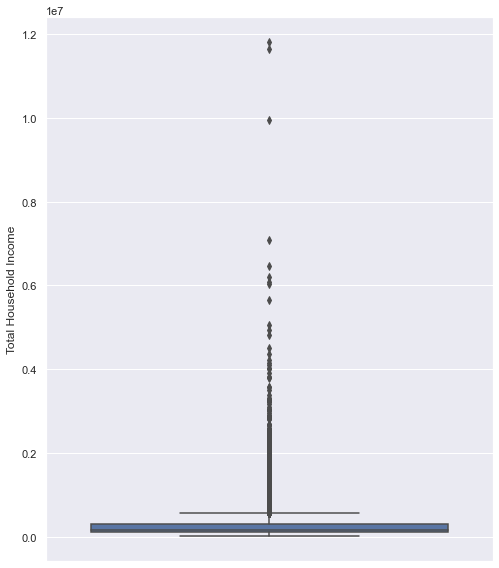

In [43]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,10)})
sns.boxplot(y=df_final["Total Household Income"])

### 4) Trate os dados Outliers inserindo no lugar a mediana e crie novamente o relatório para observarmos a diferenca.

##### Fazendo uma cópia do dataframe anterior em que os outliers serão substituídos pela mediana dos dados

In [45]:
df3= df2.copy()

df3.fillna(df3.median(), inplace=True)

##### Obtendo o relatório com as medidas de posição e dispersão após a substituição dos outliers pela mediana de cada coluna

In [46]:
relatorio3 = df3.describe().T

In [47]:
relatorio3.head(12)

,count,mean,std,min,25%,50%,75%,max
Agricultural Household indicator,41544.0,0.429858,0.676666,0.0,0.00,0.0,1.00,2.0
Household Head Age,41544.0,51.313764,14.056162,13.0,41.00,51.0,61.00,91.0
Total Number of Family members,41544.0,4.502889,2.052225,1.0,3.00,4.0,6.00,10.0
Members with age less than 5 year old,41544.0,0.365468,0.610827,0.0,0.00,0.0,1.00,2.0
Members with age 5 - 17 years old,41544.0,1.307072,1.312054,0.0,0.00,1.0,2.00,5.0
Total number of family members employed,41544.0,1.251950,1.104028,0.0,0.00,1.0,2.00,5.0
House Floor Area,41544.0,44.859450,27.225709,5.0,25.00,40.0,60.00,136.0
House Age,41544.0,18.348931,11.309589,0.0,10.00,16.0,25.00,50.0
Number of bedrooms,41544.0,1.634604,0.845748,0.0,1.00,2.0,2.00,3.0
Electricity,41544.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


### 5) Faca um relatório no qual cada variável qualitativa deve ter:
- Frequência Absoluta
- Frequência Acumulada
- Frequência Relativa
- Frequência Relativa Acumulada  

##### Obtendo as colunas qualitativas do dataframe final

In [265]:
object_columns = df_final.select_dtypes(include=['object']).columns

##### Exibindo relatório com as frequências (absoluta, acumulada, relativa e relativa acumulada) para cada variável qualitativa

In [266]:
for column in object_columns:
    tabela_freq_quali = pd.concat([
        pd.crosstab(index=df_final[column], columns='Frequency'),
        pd.crosstab(index=df_final[column], columns='Cumulative Frequency').cumsum(),
        (pd.crosstab(index=df_final[column], columns='% Frequency', normalize='columns')*100).round(2),
        (pd.crosstab(index=df_final[column], columns='Cumulative % Frequency', normalize='columns')*100).cumsum().round(2)],
        axis=1)
    tabela_freq_quali.loc['Total'] = [tabela_freq_quali['Frequency'].sum(),tabela_freq_quali['Cumulative Frequency'][-1],\
                                tabela_freq_quali['% Frequency'].sum(), tabela_freq_quali['Cumulative % Frequency'][-1]]
    display(tabela_freq_quali)

col_0,Frequency,Cumulative Frequency,% Frequency,Cumulative % Frequency
Region,,,,
A,1725.0,1725.0,4.15,4.15
B,1782.0,3507.0,4.29,8.44
C,2851.0,6358.0,6.86,15.30
D,2472.0,8830.0,5.95,21.25
E,2248.0,11078.0,5.41,26.67
F,3237.0,14315.0,7.79,34.46
G,2219.0,16534.0,5.34,39.80
H,4162.0,20696.0,10.02,49.82
I,2541.0,23237.0,6.12,55.93


col_0,Frequency,Cumulative Frequency,% Frequency,Cumulative % Frequency
Main Source of Income,,,,
Enterpreneurial Activities,10320.0,10320.0,24.84,24.84
Other sources of Income,10836.0,21156.0,26.08,50.92
Wage/Salaries,20388.0,41544.0,49.08,100.00
Total,41544.0,41544.0,100.00,100.00


col_0,Frequency,Cumulative Frequency,% Frequency,Cumulative % Frequency
Household Head Sex,,,,
Female,9061.0,9061.0,21.81,21.81
Male,32483.0,41544.0,78.19,100.00
Total,41544.0,41544.0,100.00,100.00


col_0,Frequency,Cumulative Frequency,% Frequency,Cumulative % Frequency
Household Head Marital Status,,,,
Annulled,11.0,11.0,0.03,0.03
Divorced/Separated,1425.0,1436.0,3.43,3.46
Married,31347.0,32783.0,75.45,78.91
Single,1942.0,34725.0,4.67,83.59
Unknown,1.0,34726.0,0.00,83.59
Widowed,6818.0,41544.0,16.41,100.00
Total,41544.0,41544.0,99.99,100.00


col_0,Frequency,Cumulative Frequency,% Frequency,Cumulative % Frequency
Household Head Class of Worker,,,,
Employer in own family-operated farm or business,2581.0,2581.0,7.59,7.59
Self-employed wihout any employee,13766.0,16347.0,40.48,48.07
Worked for government/government corporation,2820.0,19167.0,8.29,56.36
Worked for private establishment,13731.0,32898.0,40.38,96.74
Worked for private household,811.0,33709.0,2.38,99.12
Worked with pay in own family-operated farm or business,14.0,33723.0,0.04,99.16
Worked without pay in own family-operated farm or business,285.0,34008.0,0.84,100.00
Total,34008.0,34008.0,100.00,100.00


col_0,Frequency,Cumulative Frequency,% Frequency,Cumulative % Frequency
Type of Household,,,,
Extended Family,12932.0,12932.0,31.13,31.13
Single Family,28445.0,41377.0,68.47,99.60
Two or More Nonrelated Persons/Members,167.0,41544.0,0.40,100.00
Total,41544.0,41544.0,100.00,100.00


col_0,Frequency,Cumulative Frequency,% Frequency,Cumulative % Frequency
Type of Building/House,,,,
Commercial/industrial/agricultural building,51.0,51.0,0.12,0.12
Duplex,1084.0,1135.0,2.61,2.73
Institutional living quarter,9.0,1144.0,0.02,2.75
Multi-unit residential,1329.0,2473.0,3.20,5.95
Other building unit,2.0,2475.0,0.00,5.96
Single house,39069.0,41544.0,94.04,100.00
Total,41544.0,41544.0,99.99,100.00


col_0,Frequency,Cumulative Frequency,% Frequency,Cumulative % Frequency
Type of Walls,,,,
Light,8267.0,8267.0,19.90,19.90
NOt applicable,12.0,8279.0,0.03,19.93
Quite Strong,3487.0,11766.0,8.39,28.32
Salvaged,456.0,12222.0,1.10,29.42
Strong,27739.0,39961.0,66.77,96.19
Very Light,1583.0,41544.0,3.81,100.00
Total,41544.0,41544.0,100.00,100.00


### 6) Separe os 10% com maior renda(Ordem decrescente) em um novo csv 

##### Criando e aplicando máscara dos 10% mais ricos

In [267]:
quantil_90_renda = df_final['Total Household Income'].quantile(0.90)

In [268]:
mais_ricos = df_final['Total Household Income'] > quantil_90_renda

In [286]:
df_final[mais_ricos].head()

,ID,Region,Main Source of Income,Agricultural Household indicator,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Walls,House Floor Area,House Age,Number of bedrooms,Electricity,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,...,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
9,10,A,Enterpreneurial Activities,0,Male,53,Married,Self-employed wihout any employee,Extended Family,6,0,0,1,Single house,Strong,70,12,3,1,625753,158721,56003,43239,26488,25678,...,0,7740,65730,27000,1786,5160,7200,13180,15210,4000,0,312974,1,0,1,1,0,0,1,0,4,1,0,0,0
44,45,A,Wage/Salaries,0,Male,54,Married,Worked for government/government corporation,Single Family,2,0,0,2,Duplex,Strong,200,20,8,1,824148,99064,20355,16226,29084,15827,...,3620,13420,50550,15000,2590,27660,13494,82000,70746,5000,0,0,1,1,1,1,1,1,0,1,2,2,0,0,0
47,48,A,Enterpreneurial Activities,0,Male,29,Married,Employer in own family-operated farm or business,Single Family,5,1,2,0,Single house,Quite Strong,35,19,1,1,559202,98107,36213,30861,16505,8884,...,0,22830,47580,21000,508,4560,1620,6000,4686,2500,0,535932,1,0,0,0,1,0,0,0,2,0,0,0,0
49,50,A,Wage/Salaries,0,Male,49,Married,Worked for government/government corporation,Single Family,6,0,1,2,Duplex,Strong,209,19,4,1,977025,131485,46235,36272,30450,14452,...,0,19520,94272,60000,1315,87120,3900,17000,43458,9000,0,139582,1,1,0,1,1,2,0,0,5,1,0,0,1
51,52,A,Enterpreneurial Activities,0,Male,75,Married,Self-employed wihout any employee,Extended Family,10,1,3,1,Duplex,Strong,102,17,4,1,677321,229370,98241,82536,46818,19718,...,0,18235,71280,24000,4500,5058,3480,22500,33114,2000,0,290690,2,2,0,2,1,2,0,0,5,3,0,0,1


##### Salvando df dos mais ricos em um novo csv

In [270]:
df_final[mais_ricos].to_csv('mais_ricos.csv', index=False)

### 7) Criar os dummies para pelo menos 3 das variáveis qualitativas  

##### Criando dummies para as variáveis 'Main Source of Income', 'Household Head Sex' e 'Household Head Class of Worker'

In [271]:
df_dummies=pd.get_dummies(df_final, columns=['Main Source of Income','Household Head Sex','Household Head Class of Worker'])

In [272]:
df_dummies.head()

,ID,Region,Agricultural Household indicator,Household Head Age,Household Head Marital Status,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Walls,House Floor Area,House Age,Number of bedrooms,Electricity,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Main Source of Income_Enterpreneurial Activities,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Sex_Female,Household Head Sex_Male,Household Head Class of Worker_Employer in own family-operated farm or business,Household Head Class of Worker_Self-employed wihout any employee,Household Head Class of Worker_Worked for government/government corporation,Household Head Class of Worker_Worked for private establishment,Household Head Class of Worker_Worked for private household,Household Head Class of Worker_Worked with pay in own family-operated farm or business,Household Head Class of Worker_Worked without pay in own family-operated farm or business
0,1,A,0,49,Single,Extended Family,4,0,1,1,Single house,Strong,80,75,3,1,480332,117848,42140,38300,24676,16806,3325,13460,3000,...,1,1,0,1,1,0,0,0,2,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
1,2,A,0,40,Married,Single Family,3,0,1,2,Single house,Strong,42,15,2,1,198235,67766,17329,13008,17434,11073,2035,7833,2360,...,1,1,1,0,1,0,0,0,3,1,0,0,2,0,0,1,0,1,0,0,0,1,0,0,0
2,3,A,1,39,Married,Single Family,6,0,4,3,Single house,Light,35,12,1,0,82785,61609,34182,32001,7783,2590,1730,3795,4545,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,4,A,0,52,Married,Single Family,3,0,3,2,Single house,Light,30,15,1,1,107589,78189,34030,28659,10914,10812,690,7887,6280,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,5,A,0,65,Married,Single Family,4,0,0,2,Single house,Quite Strong,54,16,3,1,189322,94625,34820,30167,18391,11309,1395,11260,6400,...,1,0,0,1,0,0,0,0,3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0


In [273]:
df_dummies.dtypes

ID                                                                                            int64
Region                                                                                       object
Agricultural Household indicator                                                              int64
Household Head Age                                                                            int64
Household Head Marital Status                                                                object
                                                                                              ...  
Household Head Class of Worker_Worked for government/government corporation                   uint8
Household Head Class of Worker_Worked for private establishment                               uint8
Household Head Class of Worker_Worked for private household                                   uint8
Household Head Class of Worker_Worked with pay in own family-operated farm or business        uint8


### 8) Compare a média das variáveis(Quantitativos + 3 Qualitativas) da populacão dos 10% com maior renda vs o restante

##### Excluindo variáveis categóricas do dataframe

In [279]:
df_final2 = df_dummies.copy().select_dtypes(exclude=['object'])

In [281]:
df_final2['Economic Classification'] = df_final2['Total Household Income'] > quantil_90_renda

In [282]:
df_final2.head()

,ID,Agricultural Household indicator,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,...,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Main Source of Income_Enterpreneurial Activities,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Sex_Female,Household Head Sex_Male,Household Head Class of Worker_Employer in own family-operated farm or business,Household Head Class of Worker_Self-employed wihout any employee,Household Head Class of Worker_Worked for government/government corporation,Household Head Class of Worker_Worked for private establishment,Household Head Class of Worker_Worked for private household,Household Head Class of Worker_Worked with pay in own family-operated farm or business,Household Head Class of Worker_Worked without pay in own family-operated farm or business,Economic Classification
0,1,0,49,4,0,1,1,80,75,3,1,480332,117848,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,...,1,0,1,1,0,0,0,2,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,False
1,2,0,40,3,0,1,2,42,15,2,1,198235,67766,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,...,1,1,0,1,0,0,0,3,1,0,0,2,0,0,1,0,1,0,0,0,1,0,0,0,False
2,3,1,39,6,0,4,3,35,12,1,0,82785,61609,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,False
3,4,0,52,3,0,3,2,30,15,1,1,107589,78189,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,False
4,5,0,65,4,0,0,2,54,16,3,1,189322,94625,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,...,0,0,1,0,0,0,0,3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,False


In [283]:
df_final2['Economic Classification'] = df_final2['Economic Classification'].map({False:'Bottom 90%' , True: 'Richest 10%'})

##### Comparando as médias dos valores dos mais ricos (Richest 10%) com o do restante do Dataframe (Bottom 90%)

In [284]:
df_final2.drop(columns=['ID']).groupby('Economic Classification').mean().round(2).T

Economic Classification,Bottom 90%,Richest 10%
Agricultural Household indicator,0.42,0.48
Household Head Age,51.03,54.53
Total Number of Family members,4.57,5.27
Members with age less than 5 year old,0.41,0.38
Members with age 5 - 17 years old,1.39,1.09
Total number of family members employed,1.20,1.88
House Floor Area,50.15,104.71
House Age,19.70,23.95
Number of bedrooms,1.66,2.91
Electricity,0.88,1.00
